# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
df = clean_hospital_read_df

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


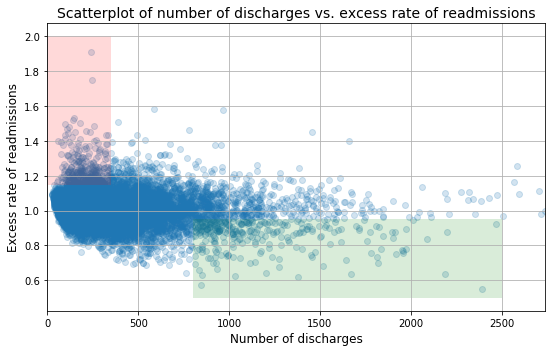

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

No, I don't agree with the above analysis. 

1. Both relied solely upon a scatterplot and a pair of local statistics. We'd be better served by including many other forms of analysis that could work in concert and help us make conclusions with specific levels of confidence, given the data we have. A good starting point would be a proper hypothesis test.

2. Given the heavy density from x=0 to x=1000 in the scatterplot, we simply can't be sure of the initial observations without any sort of regression analysis, even if they are just initial observations.

3. The statistics seem misleading given that one cutoff captures 1/30 of the domain while the second cutoff captures 2/3 of it.

4. The conclusions seem largely unfounded. Not only did it bring in a third variable that we haven't mentioned (hospital size) but it also made no attempt to determine if the 'significant correlation' is also statistically significant, which are two seperate things.

5. While I don't necessarily disagree with the recommendations given what we had thus far learned from the data, I suspect a more in-depth analysis could yield more specific insights.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [22]:
from scipy import stats
from scipy.stats import normaltest
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')

#### 1. Set up an appropriate hypothesis test.

The appropriate hypothesis test would be a T test for the correlation coefficient, which we presumably meet the requirements for given the size of our dataset and the reasonable assumption of independence between individual readmission rates.

##### Null Hypothesis: ρ = 0 
##### Alternative Hypothesis: ρ ≠ 0

Our null hypothesis is such because we must assume there is no relationship until proven otherwise.

#### 2. Compute and report the observed significance value (or p-value).

In [12]:
discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
rho, p_val = stats.pearsonr(discharges, readmission)

print('Correlation coefficient =', rho)
print('P-value =', p_val)

Correlation coefficient = -0.09739794351079353
P-value = 1.222547377680967e-25


Our non-zero correlation coefficient and extremely low p-value lead us to reject our null hypothesis. 

#### 3. Report statistical significance for  alpha = .01.

The p-value obtained is well below our alpha level, which suggests this result is statistically signicant and didn't occur by random chance.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Compared to practical significance, statistical significance is solely a factor of whether our p-value is below a particular threshold that below would suggest our observed sample didn't occur by chance. We clearly have that given our extremly low p-value. However, in terms of practical significance, we only found a weak correlation between the two variables, which means we should go back and re-think our recommendations since we don't have the evidence to claim that specific hospitals with small capacities should have to meet requirements to continue operation. Moreover, it's not evident that a hospital's readmission rate can be accounted for by the amount of "resources" the hospital has.

#### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

Advantages of the scatterplot include that it is usually a convenient way of viewing trends present in a dataset without any loss of information. Disadvantages include a lack of precision and an overall generality (not to mention overlapping of datapoints) that prevents us from coming to confident conclusions without further analysis. Furthermore, simple scatterplots also make no indication of the underlying distribution of dataset.

An alternative plot that could account for the same advantages and simultaneously make up for the disadvantages is Seaborn's joint plot.

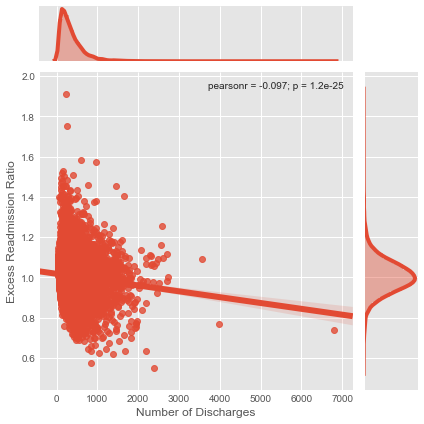

In [23]:
sns.jointplot(discharges, readmission, kind='reg')

Not only can does this visualization see the distributions of each variable, we also can easily learn from the correlation coefficent and p-value, not to mention the convenient confidence interval.